# Tag-less Classification
본 Notebook은 tag-less인 물체가 주변에 있는 8가지의 상황을 분류하는 task를 진행할 것임.  
상황은 모두 8가지, 9개의 데이터로, tag-anchor가 서로 통신하는 상화에서 주변(2m)에 있는 상황의 Cir data를 수집하였음.

In [1]:
import pandas as pd

## Data 불러오기

In [2]:
# 데이터 추출하기
def get_data(name, file):
    data = open(file, 'r')
    data_log = []

    for line in data:
        if len(line) > 1000:   # cir data를 갖는 line은 1016개의 데이터를 갖기에 1000개 이상의 데이터를 갖는 line만 추출
            data_log.append(line)

    print("len(data_log): ", len(data_log)) # 데이터 추출 개수 확인

    processed_data = []  # 데이터 처리를 위한 리스트

    for i in data_log:
        if any(c.isalpha() for c in i):
            index = i.find("RSMPL")  # CIR log가 생성되는 과정에서 끝부분이 RSMPL(01)로 끝나는 Line이 생성되는 경우가 있음
            # RSMPL이라는 문자를 찾지 못하면 -1을 반환
            if index != -1:
                i = i[index+len("RSMPL")+4:]  # RSMPL 다음의 4개의 문자를 제외한 데이터를 추출
                processed_data.append(i)
            else:
                # 문자열이 없는 경우 바로 추가
                processed_data.append(i)
        # 알파벳이 없는 경우 바로 추가
        else:
            processed_data.append(i)
    
    data_log = processed_data # 데이터 처리된 데이터를 data_log에 저장
    raw_data = []  # 데이터 처리를 위한 리스트
    for i in range(len(data_log)):
        data_sample = [int(x) for x in data_log[i].strip().split(",") if x]  # 데이터를 ,로 분리, int로 변환하여 list로 저장
        raw_data.append(data_sample)
    
    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) > 1016:
            count += 1
    
    print("not 1016: ", count)  # 1016개의 데이터를 갖지 않는 데이터 확인

    if count != 0:
        for i in range(len(raw_data)):
            if len(raw_data[i]) > 1016:
                raw_data[i] = raw_data[i][1016:]  # 1016개의 데이터를 넘는 경우 중첩된 경우이므로 후자를 선택

    count = 0
    for i in range(len(raw_data)):
        if len(raw_data[i]) != 1016:
            count += 1
    print("after: ",count)  # 잘 변경 되었는지 확인
    if count != 0:
        print("error, 잘못 처리된 데이터가 있습니다.")  # 없을거 같지만 그래도 만듦, 그래서 어딘지까지는 안 알려줌
        return

    raw_data = pd.DataFrame(raw_data)  # 데이터프레임으로 변환

    # CIR data를 절대값처리한 후 정규화한 형태로 변환
    abs_normalized_data = raw_data.apply(lambda x: x*x, axis=1)  # 제곱 처리  
    abs_normalized_data = abs_normalized_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)  # 정규화

    
    abs_normalized_data.to_csv(name)
    print(len(raw_data))

## 

log로부터 모든 data 추출하기

In [3]:
# get_data("지정하고 싶은 이름, "파일 이름")
get_data("data/R_anchor_2m_0m.csv", "20240819-203038_DecaWaveAllAccum_R_anchor_2m_0m.log")
get_data("data/R_anchor_2m_1_5m.csv", "20240819-210400_DecaWaveAllAccum_R_anchor_2m_1_5m.log")
get_data("data/R_tag_2m_0m.csv", "20240819-204659_DecaWaveAllAccum_R_tag_2m_0m.log")
get_data("data/R_tag_2m_1_5m.csv", "20240819-205521_DecaWaveAllAccum_R_tag_2m_1_5m.log")
get_data("data/L_anchor_2m_0m.csv", "20240819-211414_DecaWaveAllAccum_L_anchor_2m_0m.log")
get_data("data/L_anchor_2m_1_5m.csv", "20240819-213245_DecaWaveAllAccum_L_anchor_2m_1_5m.log")
get_data("data/L_tag_2m_0m.csv", "20240819-212655_DecaWaveAllAccum_L_tag_2m_0m.log")
get_data("data/L_tag_2m_1_5m.csv", "20240819-213858_DecaWaveAllAccum_L_tag_2m_1_5m.log")
get_data("data/ground_truth.csv", "20240819-214752_DecaWaveAllAccum_empty.log")

len(data_log):  583
not 1016:  3
after:  0
583
len(data_log):  803
not 1016:  9
after:  0
803
len(data_log):  634
not 1016:  3
after:  0
634
len(data_log):  783
not 1016:  3
after:  0
783
len(data_log):  799
not 1016:  6
after:  0
799
len(data_log):  686
not 1016:  12
after:  0
686
len(data_log):  630
not 1016:  10
after:  0
630
len(data_log):  648
not 1016:  3
after:  0
648
len(data_log):  709
not 1016:  10
after:  0
709


In [4]:
# data 불러오기
ra20 = pd.read_csv("data/R_anchor_2m_0m.csv", index_col=0)
ra215 = pd.read_csv("data/R_anchor_2m_1_5m.csv", index_col=0)
rt20 = pd.read_csv("data/R_tag_2m_0m.csv", index_col=0)
rt215 = pd.read_csv("data/R_tag_2m_1_5m.csv", index_col=0)
la20 = pd.read_csv("data/L_anchor_2m_0m.csv", index_col=0)
la215 = pd.read_csv("data/L_anchor_2m_1_5m.csv", index_col=0)
lt20 = pd.read_csv("data/L_tag_2m_0m.csv", index_col=0)
lt215 = pd.read_csv("data/L_tag_2m_1_5m.csv", index_col=0)
empty = pd.read_csv("data/ground_truth.csv", index_col=0)

## 500개씩 중첩하여 시각화

In [5]:
print("ra20: ", ra20.shape)
print("ra215: ", ra215.shape)
print("rt20: ", rt20.shape)
print("rt215: ", rt215.shape)
print("la20: ", la20.shape)
print("la215: ", la215.shape)
print("lt20: ", lt20.shape)
print("lt215: ", lt215.shape)
print("empty: ", empty.shape)

ra20:  (583, 1016)
ra215:  (803, 1016)
rt20:  (634, 1016)
rt215:  (783, 1016)
la20:  (799, 1016)
la215:  (686, 1016)
lt20:  (630, 1016)
lt215:  (648, 1016)
empty:  (709, 1016)


전체적으로 실험 환경에 의한 오류 방지를 위해 앞, 뒤 20개씩 제거한 후 사용하겠음

In [6]:
ra20 = ra20[20:-20]
ra215 = ra215[20:-20]
rt20 = rt20[20:-20]
rt215 = rt215[20:-20]
la20 = la20[20:-20]
la215 = la215[20:-20]
lt20 = lt20[20:-20]
lt215 = lt215[20:-20]
empty = empty[20:-20]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

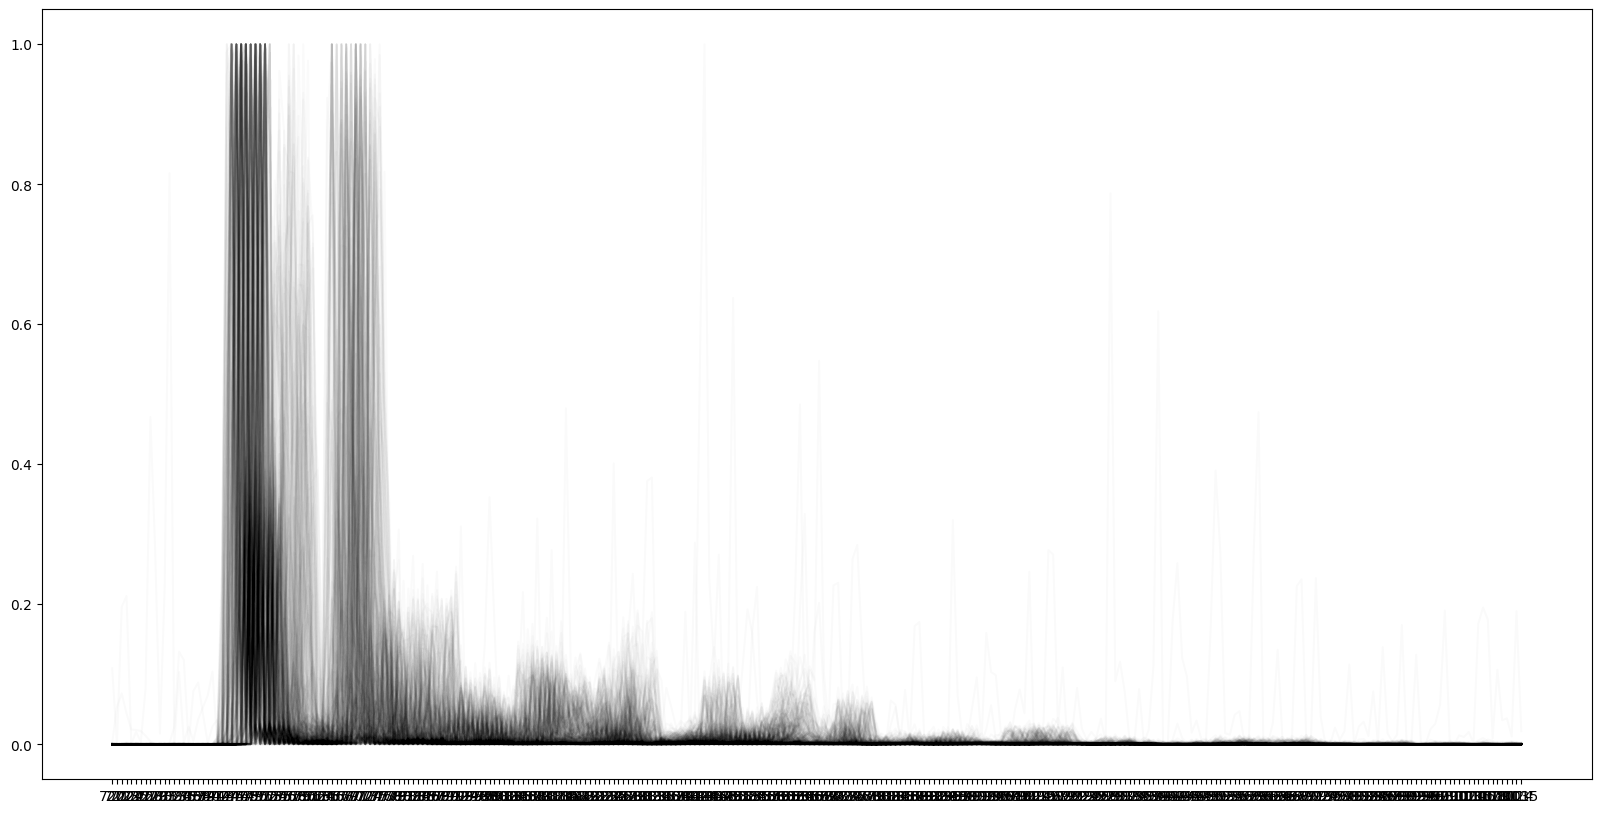

In [8]:
plt.figure(figsize=(20, 10))
for i in range(500):
    plt.plot(ra20.iloc[i][720:], color='black', alpha=0.02, label="ra20")
plt.show()

시점이 너무 안 맞아서, 0.5를 넘는 부분이 시작점으로 맞춰보겠음

In [9]:
# 각 샘플의 최대값의 index를 반환
def find_max_index(row):
    return np.argmax(row)

In [10]:
# 각각 최대값의 시점이 다른 것을 확인
for i in range(5):
    print(find_max_index(ra20.iloc[i]))

751
748
753
768
749


In [90]:
peak_same_empty = []
for i in range(empty.shape[0]):
    start = find_max_index(empty.iloc[i])
    peak_same_empty.append(empty.iloc[i][start-10:start+150].values)
peak_same_empty = pd.DataFrame(peak_same_empty)

In [11]:
peak_same_ra20 = []
for i in range(ra20.shape[0]):
    start = find_max_index(ra20.iloc[i])
    peak_same_ra20.append(ra20.iloc[i][start-10:start+150].values)
peak_same_ra20 = pd.DataFrame(peak_same_ra20)

In [12]:
peak_same_rt20 = []
for i in range(rt20.shape[0]):
    start = find_max_index(rt20.iloc[i])
    peak_same_rt20.append(rt20.iloc[i][start-10:start+150].values)
peak_same_rt20 = pd.DataFrame(peak_same_rt20)

In [13]:
peak_same_la20 = []
for i in range(la20.shape[0]):
    start = find_max_index(la20.iloc[i])
    peak_same_la20.append(la20.iloc[i][start-10:start+150].values)
peak_same_la20 = pd.DataFrame(peak_same_la20)

peak_same_lt20 = []
for i in range(lt20.shape[0]):
    start = find_max_index(lt20.iloc[i])
    peak_same_lt20.append(lt20.iloc[i][start-10:start+150].values)
peak_same_lt20 = pd.DataFrame(peak_same_lt20)

In [14]:
peak_same_la215 = []
for i in range(la215.shape[0]):
    start = find_max_index(la215.iloc[i])
    peak_same_la215.append(la215.iloc[i][start-10:start+150].values)
peak_same_la215 = pd.DataFrame(peak_same_la215)

In [15]:
peak_same_lt215 = []
for i in range(lt215.shape[0]):
    start = find_max_index(lt215.iloc[i])
    peak_same_lt215.append(lt215.iloc[i][start-10:start+150].values)
peak_same_lt215 = pd.DataFrame(peak_same_lt215)

In [66]:
peak_same_ra215 = []
for i in range(ra215.shape[0]):
    start = find_max_index(ra215.iloc[i])
    peak_same_ra215.append(ra215.iloc[i][start-10:start+150].values)
peak_same_ra215 = pd.DataFrame(peak_same_ra215)

peak_same_rt215 = []
for i in range(rt215.shape[0]):
    start = find_max_index(rt215.iloc[i])
    peak_same_rt215.append(rt215.iloc[i][start-10:start+150].values)
peak_same_rt215 = pd.DataFrame(peak_same_rt215)

### 오른쪽 상황, Anchor에 가까운 2m, 0m 상황

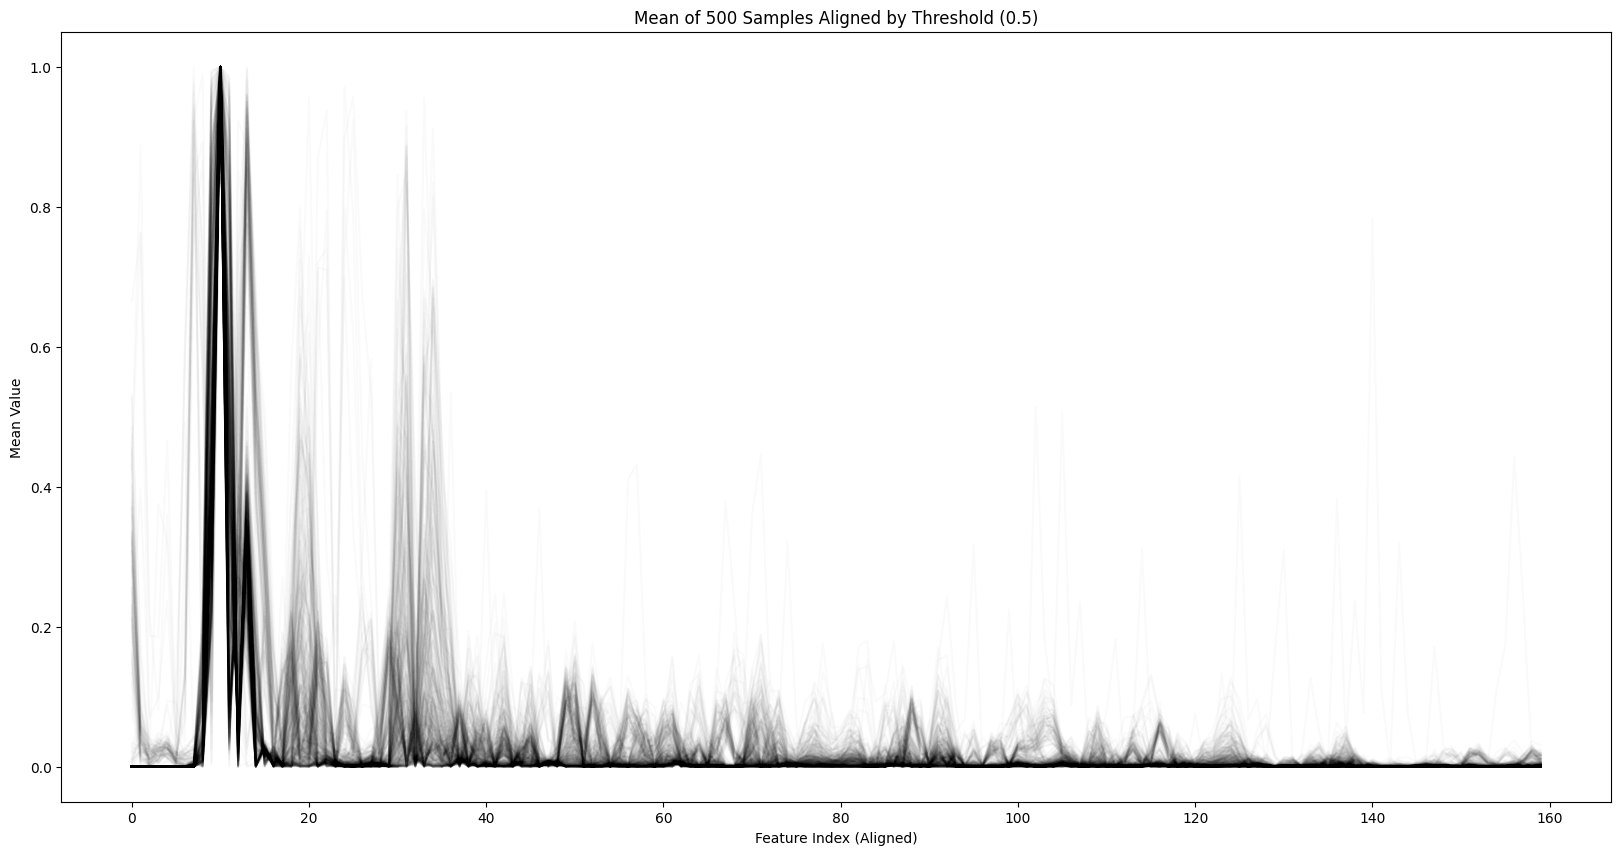

In [16]:
plt.figure(figsize=(20, 10))
for i in range(500):
    plt.plot(peak_same_ra20.iloc[i], color='black', alpha=0.02, label="ra20")
plt.title('Mean of 500 Samples Aligned by Threshold (0.5)')
plt.xlabel('Feature Index (Aligned)')
plt.ylabel('Mean Value')
plt.show()

### 오른쪽 상황, Tag에 가까운 2m, 0m 상황

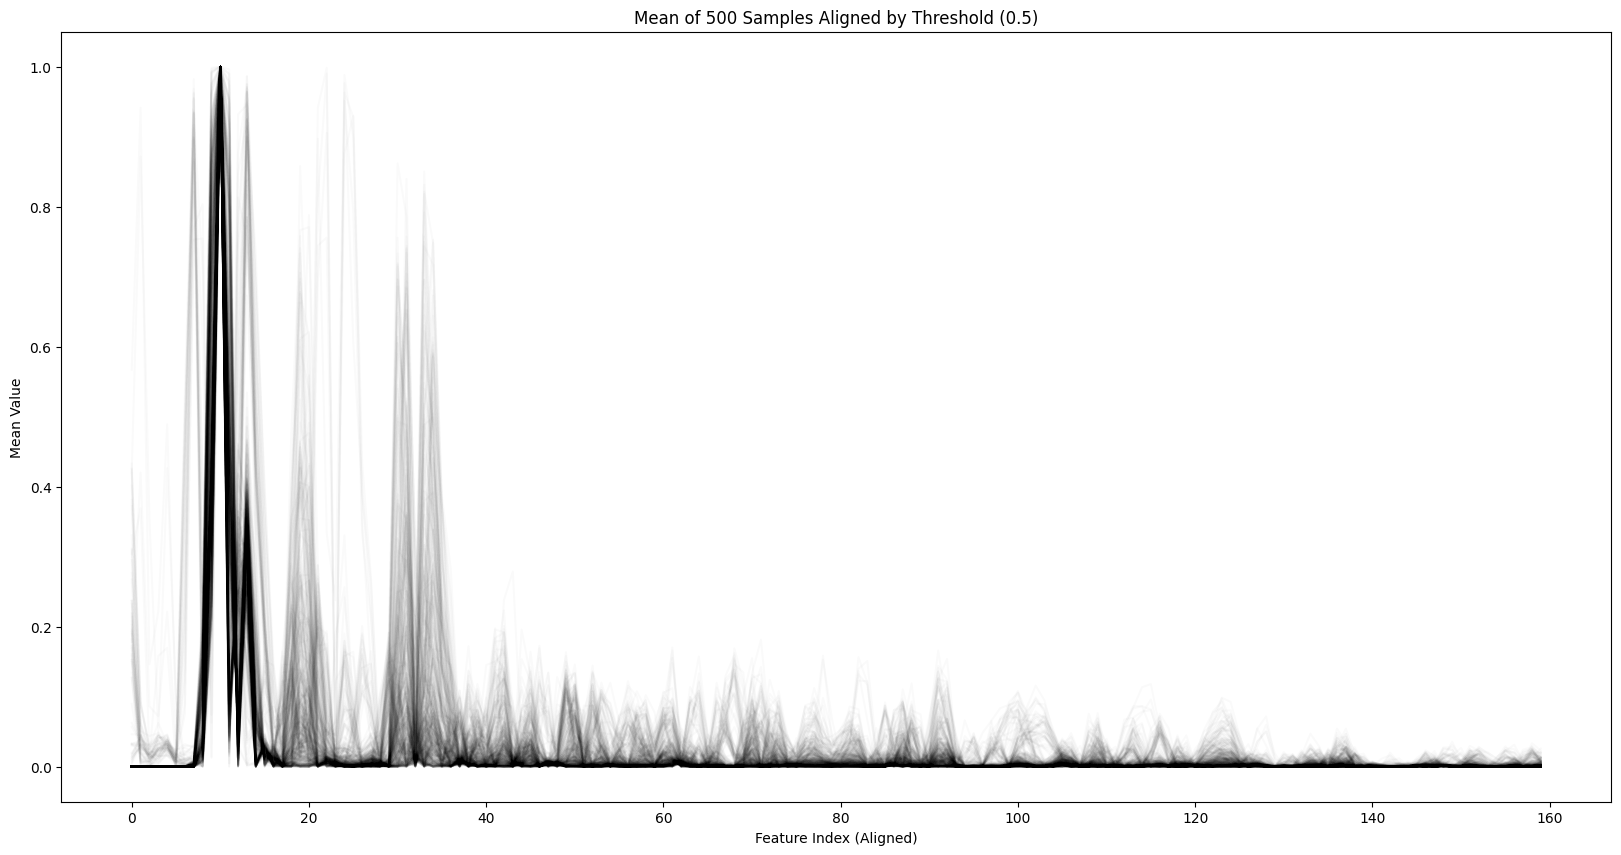

In [17]:
plt.figure(figsize=(20, 10))
for i in range(500):
    plt.plot(peak_same_rt20.iloc[i], color='black', alpha=0.02, label="ra20")
plt.title('Mean of 500 Samples Aligned by Threshold (0.5)')
plt.xlabel('Feature Index (Aligned)')
plt.ylabel('Mean Value')
plt.show()

## 500개 평균 시각화

### 오른쪽 상황, Anchor에 가까운 2m, 0m 상황

<Axes: >

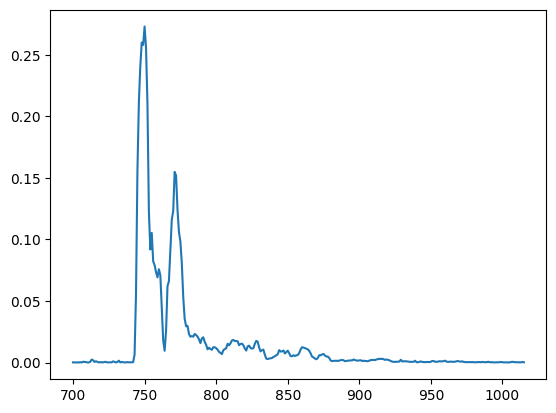

In [18]:
mean_ra20 = ra20.mean()
mean_ra20[700:].plot()

### 오른쪽 상황, Tag에 가까운 2m, 0m 상황

<Axes: >

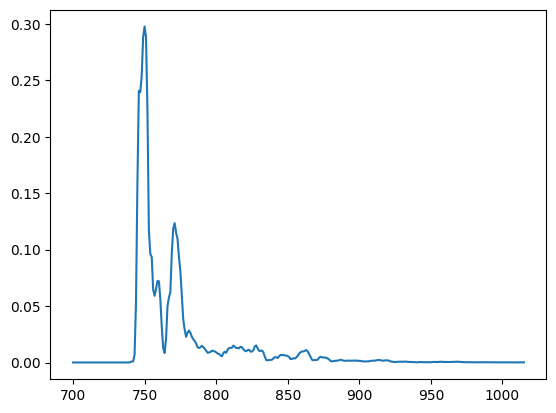

In [19]:
mean_rt20 = rt20.mean()
mean_rt20[700:].plot()

중첩한 image

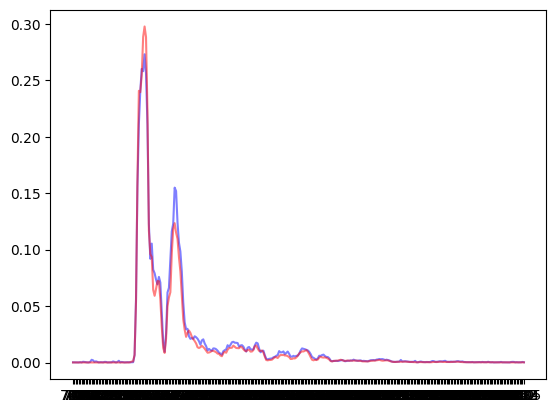

In [20]:
plt.plot(mean_ra20[700:], color='blue', alpha=0.5, label='ra20')
plt.plot(mean_rt20[700:], color='red', alpha=0.5, label='rt20')
plt.show()

### 오른쪽 상황에서 Anchor에 가까운 : 2m 0m인 상황 vs 2m 1.5m인 상황 겹쳐보기  
가설에 의하면 두 부분의 multi path 경로의 길이의 합이 서로 다르기 때문에 cir data 상에서 차이가 있어야한다.|

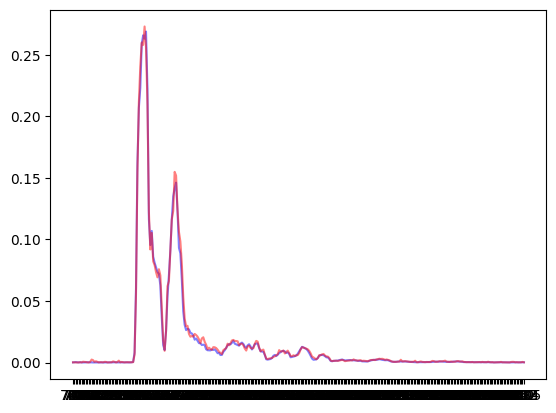

In [21]:
mean_ra215 = ra215.mean()
plt.plot(mean_ra215[700:], color='blue', alpha=0.5, label='ra215')
plt.plot(mean_ra20[700:], color='red', alpha=0.5, label='ra20')
plt.show()

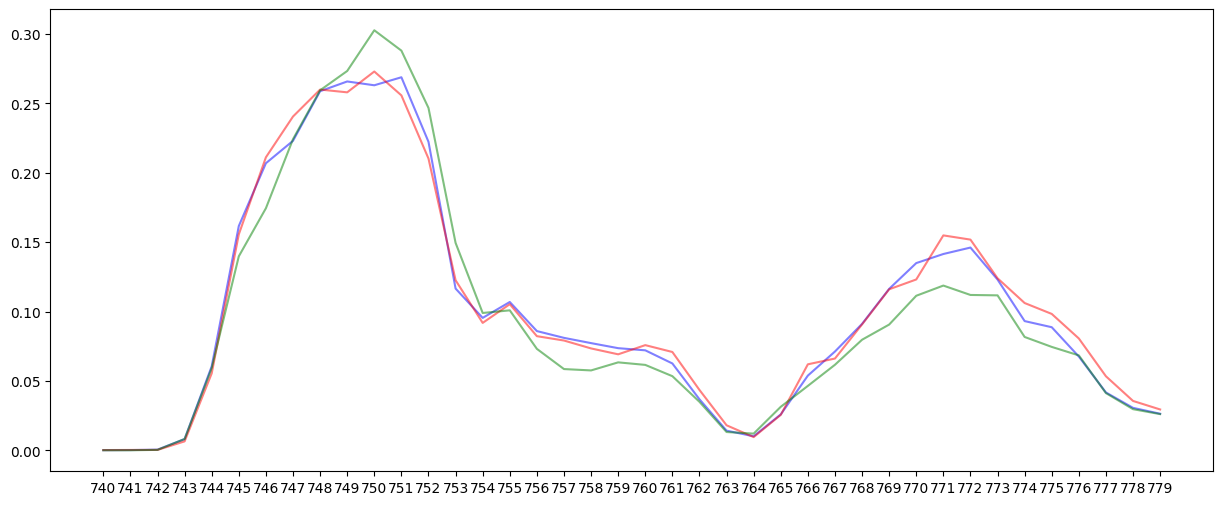

In [78]:
mean_empty = empty.mean()
mean_rt215 = rt215.mean()
plt.figure(figsize=(15, 6))
plt.plot(mean_ra215[740:780], color='blue', alpha=0.5, label='ra215')
plt.plot(mean_ra20[740:780], color='red', alpha=0.5, label='ra20')
plt.plot(mean_rt215[740:780], color='green', alpha=0.5, label='ra20')

In [80]:
max(mean_ra20[740:780])

0.2730012744359129

### 아무것도 없는 상황과 ra20상황

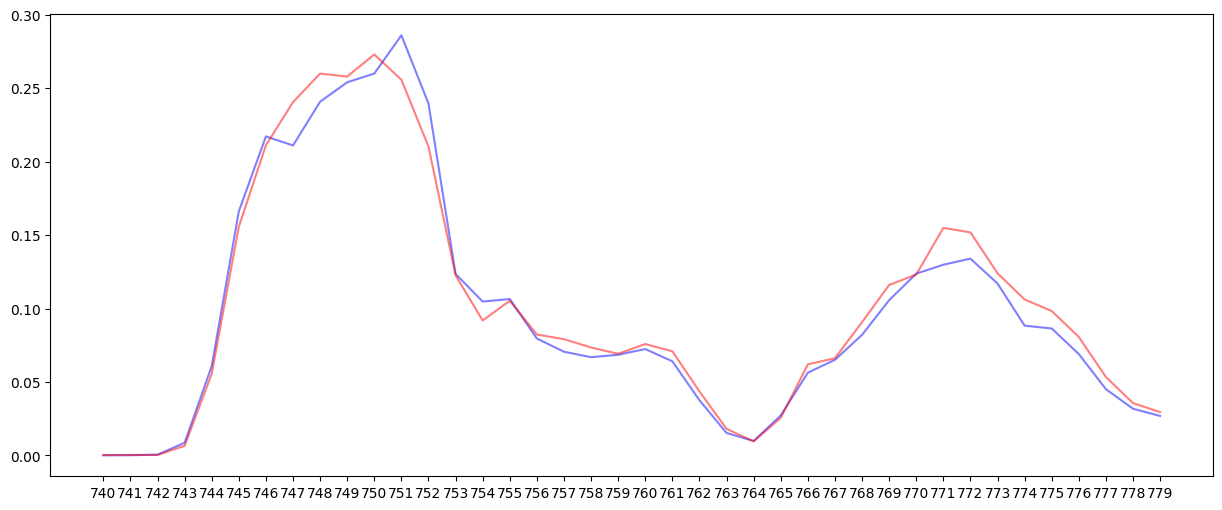

In [74]:
mean_empty = empty.mean()
plt.figure(figsize=(15, 6))
plt.plot(mean_empty[740:780], color='blue', alpha=0.5, label='empty')
plt.plot(mean_ra20[740:780], color='red', alpha=0.5, label='ra20')

## 시점을 맞춘 500개 평균

In [23]:
print(peak_same_ra20.shape)
print(peak_same_rt20.shape)

(543, 160)
(594, 160)


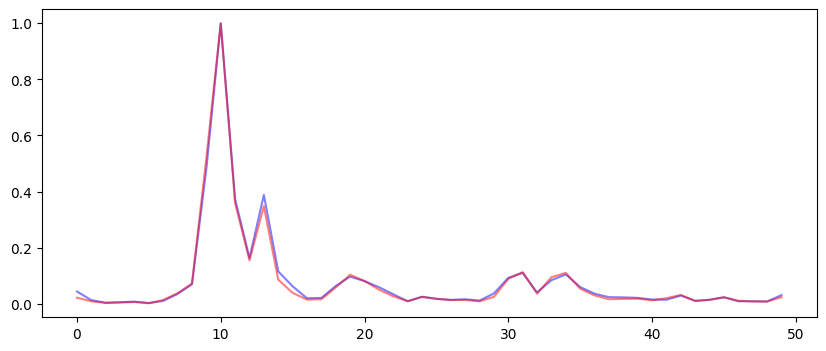

In [69]:
mean_peak_same_ra20 = peak_same_ra20.mean()
mean_peak_same_rt20 = peak_same_rt20.mean()
plt.figure(figsize=(10, 4))
plt.plot(mean_peak_same_ra20[:50], color='blue', alpha=0.5, label='peak_same_ra20')
plt.plot(mean_peak_same_rt20[:50], color='red', alpha=0.5, label='peak_same_rt20')

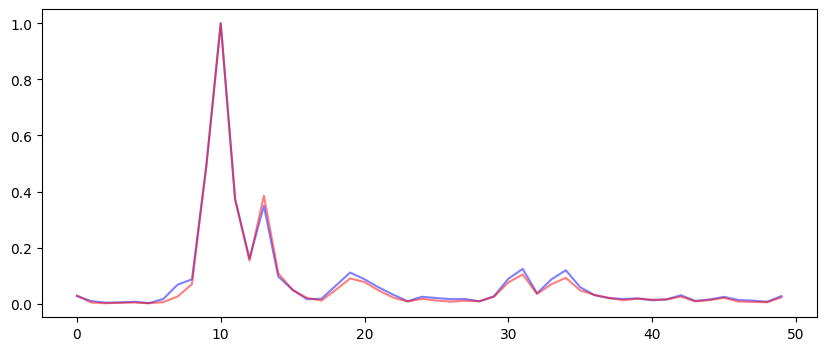

In [68]:
mean_peak_same_ra215 = peak_same_ra215.mean()
mean_peak_same_rt215 = peak_same_rt215.mean()
plt.figure(figsize=(10, 4))
plt.plot(mean_peak_same_ra215[:50], color='blue', alpha=0.5, label='peak_same_ra215')
plt.plot(mean_peak_same_rt215[:50], color='red', alpha=0.5, label='peak_same_rt215')

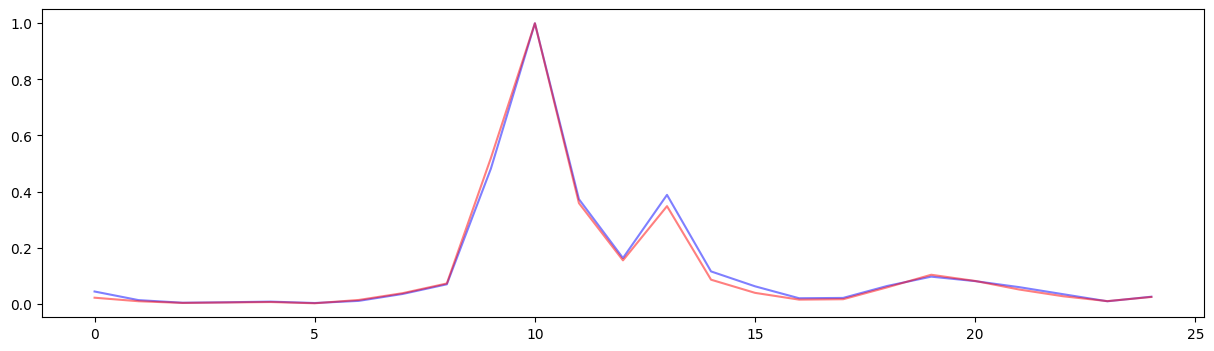

In [83]:
mean_peak_same_ra20 = peak_same_ra20.mean()
mean_peak_same_rt20 = peak_same_rt20.mean()
plt.figure(figsize=(15, 4))
plt.plot(mean_peak_same_ra20[:25], color='blue', alpha=0.5, label='peak_same_ra20')
plt.plot(mean_peak_same_rt20[:25], color='red', alpha=0.5, label='peak_same_rt20')

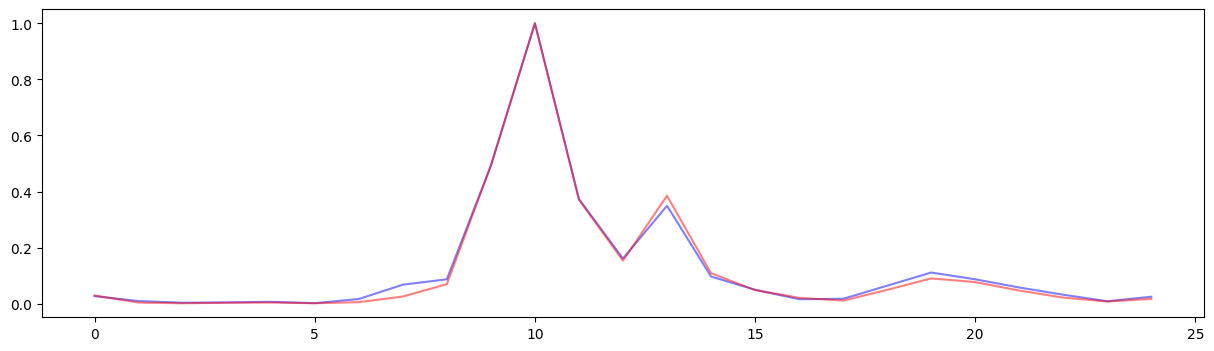

In [84]:
mean_peak_same_ra215 = peak_same_ra215.mean()
mean_peak_same_rt215 = peak_same_rt215.mean()
plt.figure(figsize=(15, 4))
plt.plot(mean_peak_same_ra215[:25], color='blue', alpha=0.5, label='peak_same_ra215')
plt.plot(mean_peak_same_rt215[:25], color='red', alpha=0.5, label='peak_same_rt215')

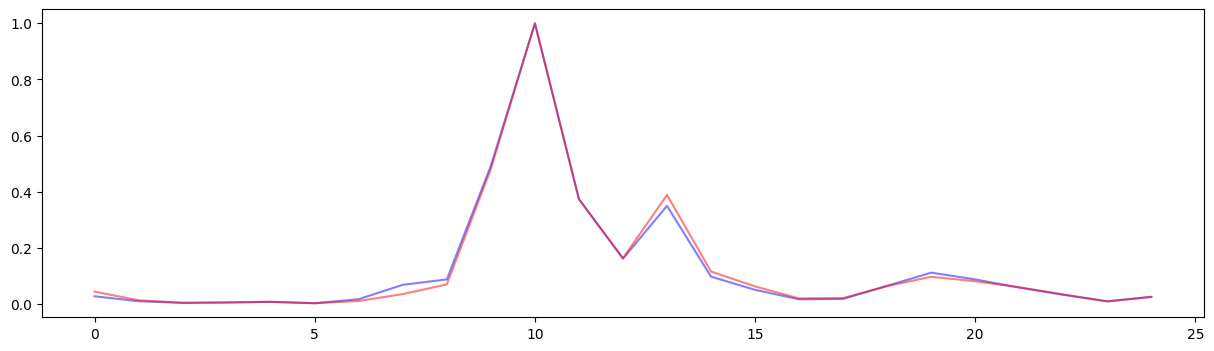

In [87]:
plt.figure(figsize=(15, 4))
plt.plot(mean_peak_same_ra215[:25], color='blue', alpha=0.5, label='peak_same_ra215')
plt.plot(mean_peak_same_ra20[:25], color='red', alpha=0.5, label='peak_same_ra20')

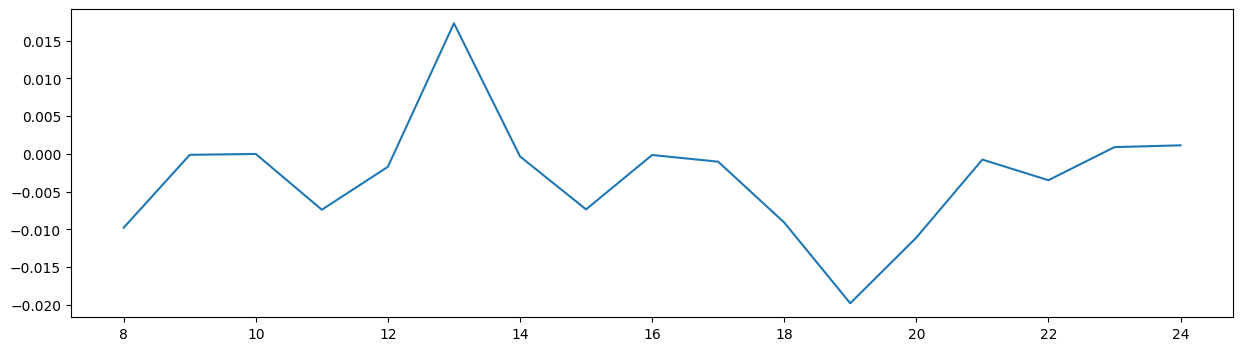

In [98]:
mean_peak_same_empty = peak_same_empty.mean()
plt.figure(figsize=(15, 4))
plt.plot(mean_peak_same_empty[8:25] - mean_peak_same_ra215[8:25])

In [97]:
print(mean_peak_same_empty[8:25] - mean_peak_same_ra20[8:25])

8     0.008050
9     0.010517
10    0.000000
11   -0.006868
12   -0.003506
13   -0.021587
14   -0.018621
15   -0.019460
16   -0.003562
17   -0.004161
18   -0.008073
19   -0.005096
20   -0.004499
21   -0.001991
22   -0.005246
23    0.001103
24    0.001048
dtype: float64


In [89]:
mean_peak_same_ra20[8:20]  # 3ns 차이

8     0.069271
9     0.481487
10    1.000000
11    0.372851
12    0.162912
13    0.388093
14    0.115170
15    0.062060
16    0.019514
17    0.020697
18    0.063272
19    0.096537
dtype: float64

### 각 데이터마다의 variance를 보겠다

In [99]:
var_peak_same_ra20 = peak_same_ra20.var()
var_peak_same_ra215 = peak_same_ra215.var()
var_peak_same_rt20 = peak_same_rt20.var()
var_peak_same_rt215 = peak_same_rt215.var()
var_peak_same_empty = peak_same_empty.var()
var_peak_same_la20 = peak_same_la20.var()
var_peak_same_la215 = peak_same_la215.var()
var_peak_same_lt20 = peak_same_lt20.var()
var_peak_same_lt215 = peak_same_lt215.var()

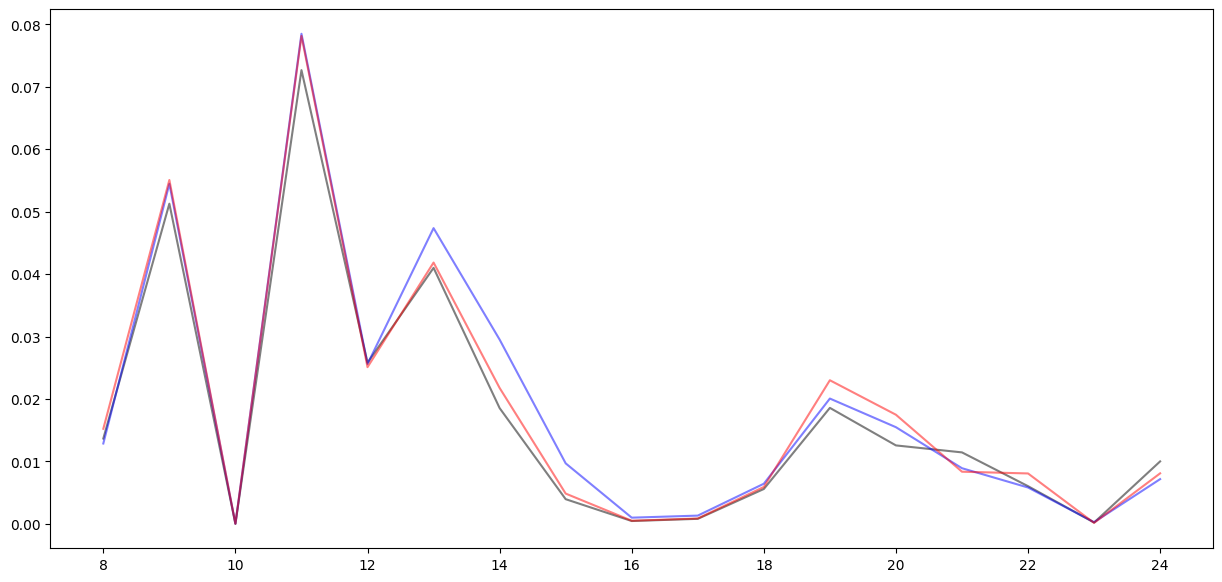

In [102]:
plt.figure(figsize=(15, 7))
plt.plot(var_peak_same_empty[8:25], color='black', alpha=0.5, label='var_peak_same_empty')
plt.plot(var_peak_same_ra20[8:25], color='blue', alpha=0.5, label='var_peak_same_ra20')  # 8ns 차이
plt.plot(var_peak_same_ra215[8:25], color='red', alpha=0.5, label='var_peak_same_ra215')  # 5ns 차이

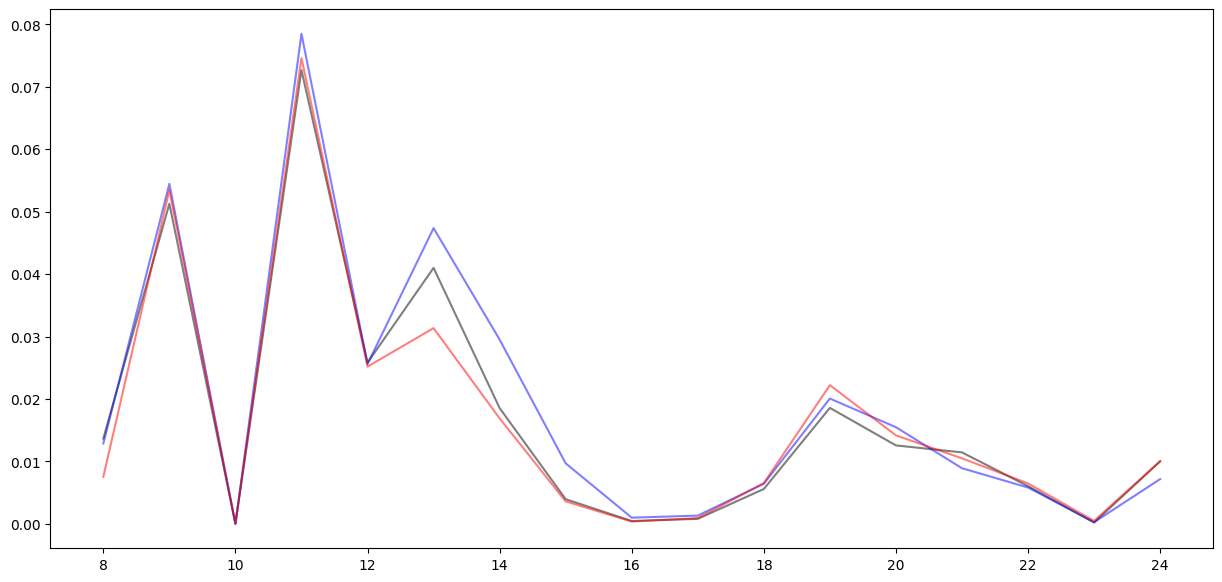

In [103]:
plt.figure(figsize=(15, 7))
plt.plot(var_peak_same_empty[8:25], color='black', alpha=0.5, label='var_peak_same_empty')
plt.plot(var_peak_same_ra20[8:25], color='blue', alpha=0.5, label='var_peak_same_ra20')  # 8ns 차이
plt.plot(var_peak_same_rt20[8:25], color='red', alpha=0.5, label='var_peak_same_rt20')   # 8ns 차이

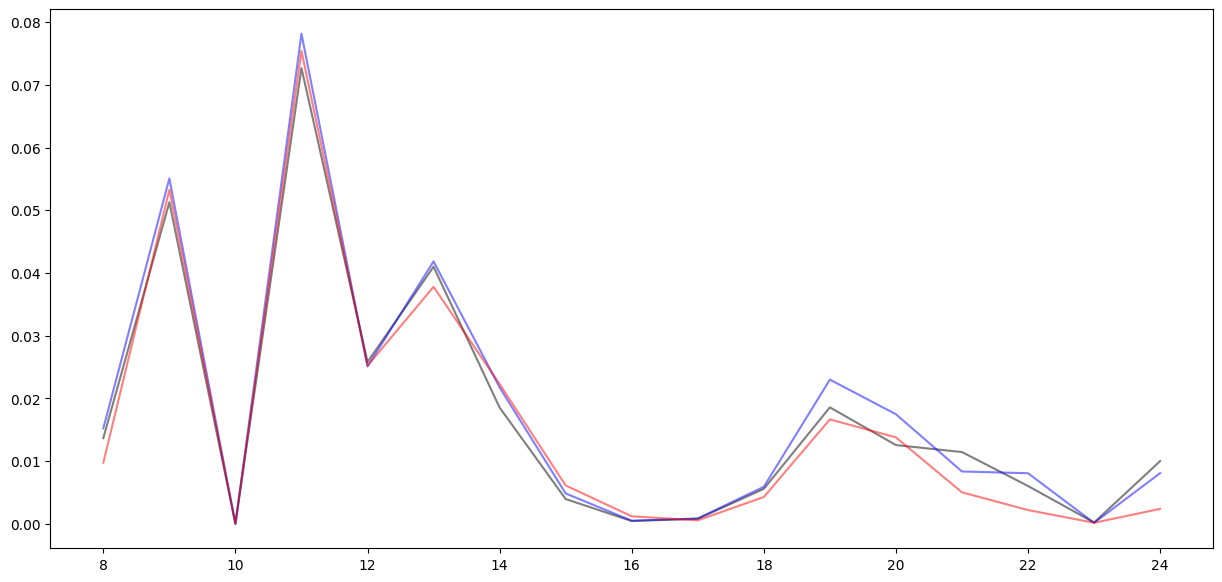

In [104]:
plt.figure(figsize=(15, 7))
plt.plot(var_peak_same_empty[8:25], color='black', alpha=0.5, label='var_peak_same_empty')
plt.plot(var_peak_same_ra215[8:25], color='blue', alpha=0.5, label='var_peak_same_ra215')  # 5ns 차이
plt.plot(var_peak_same_rt215[8:25], color='red', alpha=0.5, label='var_peak_same_rt215')   # 5ns 차이

## CNN model
눈으로는 보이지 않지만, 혹시나 DL로 해결할 수 있을까? 하여 돌려봄

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split

### data split

In [26]:
# 성능 비교를 위해 각각 500개씩 추출
ra20 = ra20[:500]
ra215 = ra215[:500]
rt20 = rt20[:500]
rt215 = rt215[:500]
la20 = la20[:500]
la215 = la215[:500]
lt20 = lt20[:500]
lt215 = lt215[:500]
empty = empty[:500]

### ra20과 rt20을 분류할 수 있는지

In [166]:
label = [0]*500 + [1]*500
label = pd.DataFrame(label)

train = pd.concat([ra20, rt20], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

label:  (1000, 1) train:  (1000, 1016)


In [172]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=42)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

x_train:  (800, 1016) x_test:  (200, 1016) y_train:  (800, 1) y_test:  (200, 1)


In [173]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_31 (Conv1D)              │ (None, 1013, 10)       │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, 1009, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 504, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 10080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │        10,081 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,151 (43.56 KB)

 Trainable params: 11,151 (43.56 KB)

 Non-trainable params: 0 (0.00 B)

In [174]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [175]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5200 - loss: 0.6933 - val_accuracy: 0.4950 - val_loss: 0.6934
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5338 - loss: 0.6912 - val_accuracy: 0.4650 - val_loss: 0.6939
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5438 - loss: 0.6884 - val_accuracy: 0.4450 - val_loss: 0.6949
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5588 - loss: 0.6841 - val_accuracy: 0.4850 - val_loss: 0.6948
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5504 - loss: 0.6859 - val_accuracy: 0.4900 - val_loss: 0.6937
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5370 - loss: 0.6839 - val_accuracy: 0.5350 - val_loss: 0.6918
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 0.6867 - val_accuracy: 0.5350 - val_loss: 0.6912
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 0.6816 - val_accuracy: 0.5050 - v

7/7 - 0s - 3ms/step - accuracy: 0.8100 - loss: 0.3803


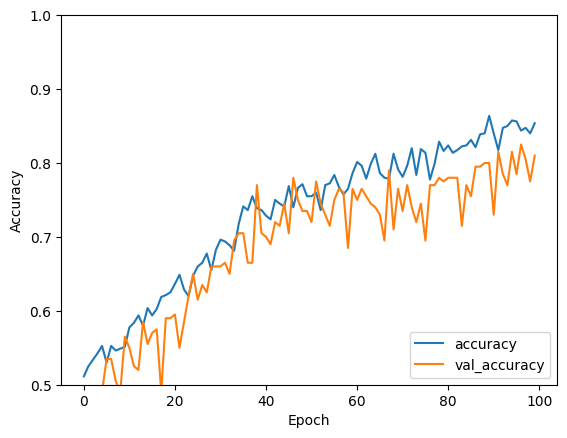

In [176]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### ra215와 rt215를 분류

In [33]:
label = [0]*500 + [1]*500
label = pd.DataFrame(label)

train = pd.concat([ra215, rt215], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

label:  (1000, 1) train:  (1000, 1016)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=42)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

x_train:  (900, 1016) x_test:  (100, 1016) y_train:  (900, 1) y_test:  (100, 1)


In [35]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [36]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0,)

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 1013, 10)       │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 1009, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 504, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        10,081 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,151 (43.56 KB)

 Trainable params: 11,151 (43.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5156 - loss: 0.6930 - val_accuracy: 0.5400 - val_loss: 0.6888
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5420 - loss: 0.6905 - val_accuracy: 0.5900 - val_loss: 0.6863
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5074 - loss: 0.6933 - val_accuracy: 0.5900 - val_loss: 0.6855
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5388 - loss: 0.6909 - val_accuracy: 0.5800 - val_loss: 0.6808
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5392 - loss: 0.6896 - val_accuracy: 0.5900 - val_loss: 0.6855
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5332 - loss: 0.6895 - val_accuracy: 0.5500 - val_loss: 0.6873
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5698 - loss: 0.6857 - val_accuracy: 0.5700 - val_loss: 0.6840
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5592 - loss: 0.6824 - val_accuracy: 0.5700 - v

4/4 - 0s - 3ms/step - accuracy: 0.7900 - loss: 0.4916


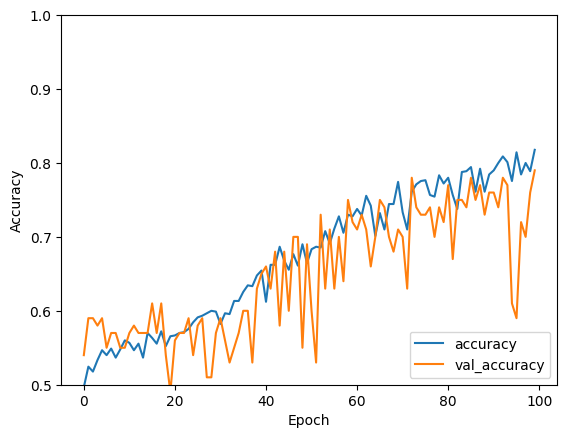

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### ra20과 la20을 구별할 수 있는가?

In [38]:
label = [0]*500 + [1]*500
label = pd.DataFrame(label)

train = pd.concat([ra20, la20], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

label:  (1000, 1) train:  (1000, 1016)


In [39]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=42)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

x_train:  (900, 1016) x_test:  (100, 1016) y_train:  (900, 1) y_test:  (100, 1)


In [40]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [41]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(1016,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[callback])

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 1013, 10)       │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1009, 20)       │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 504, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        10,081 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,151 (43.56 KB)

 Trainable params: 11,151 (43.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4955 - loss: 0.6931 - val_accuracy: 0.5100 - val_loss: 0.6935
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5008 - loss: 0.6922 - val_accuracy: 0.5100 - val_loss: 0.6951
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5288 - loss: 0.6900 - val_accuracy: 0.5100 - val_loss: 0.6951
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 0.6903 - val_accuracy: 0.5200 - val_loss: 0.6961
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5283 - loss: 0.6928 - val_accuracy: 0.4900 - val_loss: 0.6960
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5429 - loss: 0.6871 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5627 - loss: 0.6792 - val_accuracy: 0.5000 - val_loss: 0.6953
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5603 - loss: 0.6820 - val_accuracy: 0.5100 - v

4/4 - 0s - 4ms/step - accuracy: 0.8200 - loss: 0.3606


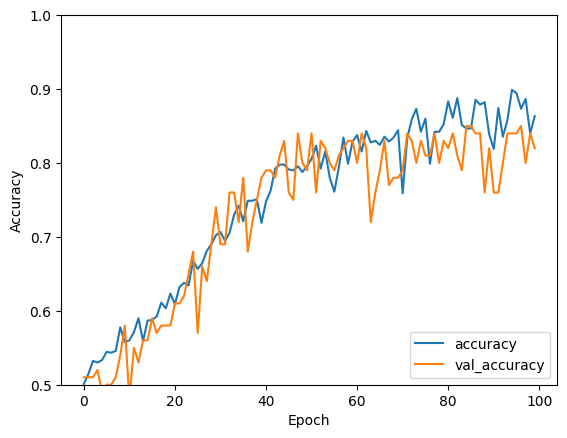

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

## CNN with peak_same

### peak_same_ra20, peak_same_rt20 분류

In [43]:
print(peak_same_ra20.shape)
print(peak_same_rt20.shape)

(543, 160)
(594, 160)


In [44]:
label = [0]*500 + [1]*500
label = pd.DataFrame(label)

train = pd.concat([peak_same_ra20[:500], peak_same_rt20[:500]], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=42)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

label:  (1000, 1) train:  (1000, 160)
x_train:  (900, 160) x_test:  (100, 160) y_train:  (900, 1) y_test:  (100, 1)


In [45]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [46]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(160,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),)

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 157, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 153, 20)        │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 76, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1520)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,591 (10.12 KB)

 Trainable params: 2,591 (10.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4572 - loss: 0.6940 - val_accuracy: 0.4900 - val_loss: 0.6932
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5255 - loss: 0.6910 - val_accuracy: 0.5100 - val_loss: 0.6932
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5352 - loss: 0.6891 - val_accuracy: 0.5100 - val_loss: 0.6930
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5201 - loss: 0.6889 - val_accuracy: 0.5100 - val_loss: 0.6926
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - loss: 0.6836 - val_accuracy: 0.4700 - val_loss: 0.6966
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 0.6801 - val_accuracy: 0.5200 - val_loss: 0.6928
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5426 - loss: 0.6866 - val_accuracy: 0.5300 - val_loss: 0.6929
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 0.6789 - val_accuracy: 0.5100 - v

4/4 - 0s - 5ms/step - accuracy: 0.9200 - loss: 0.4632


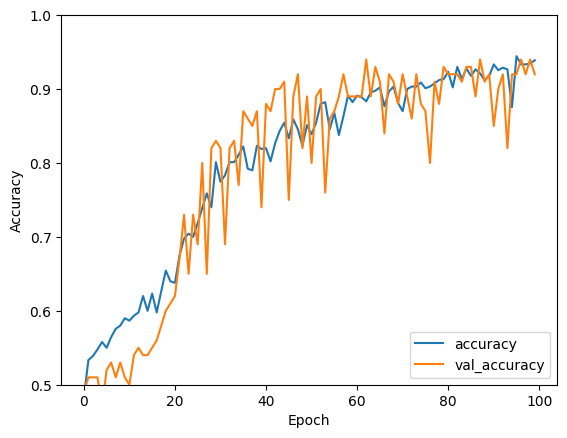

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### lt215, la215

In [48]:
print(peak_same_la20.shape)
print(peak_same_lt20.shape)

(759, 160)
(590, 160)


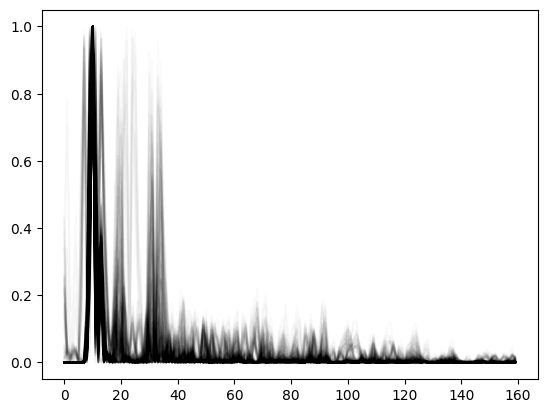

In [49]:
for i in range(500):
    plt.plot(peak_same_la20.iloc[i], color='black', alpha=0.02, label="la20")

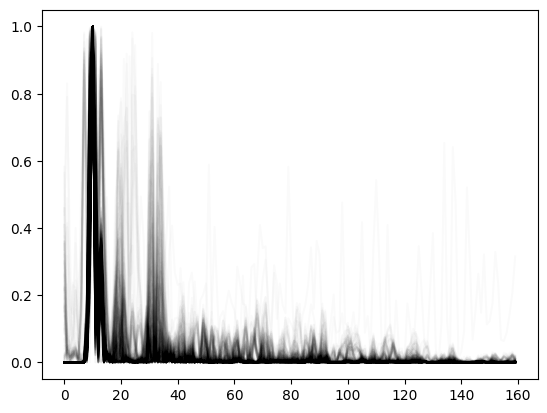

In [50]:
for i in range(500):
    plt.plot(peak_same_lt20.iloc[i], color='black', alpha=0.02, label="lt20")

In [51]:
label = [0]*759 + [1]*590
label = pd.DataFrame(label)

train = pd.concat([peak_same_la20, peak_same_lt20], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25, random_state=15)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

label:  (1349, 1) train:  (1349, 160)
x_train:  (1011, 160) x_test:  (338, 160) y_train:  (1011, 1) y_test:  (338, 1)


In [52]:
# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [53]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(160,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),)

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 157, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 153, 20)        │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 76, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1520)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,591 (10.12 KB)

 Trainable params: 2,591 (10.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5171 - loss: 0.6915 - val_accuracy: 0.5680 - val_loss: nan
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5605 - loss: 0.6845 - val_accuracy: 0.5680 - val_loss: nan
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5834 - loss: 0.6799 - val_accuracy: 0.5651 - val_loss: inf
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 0.6773 - val_accuracy: 0.5651 - val_loss: inf
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 0.6807 - val_accuracy: 0.5651 - val_loss: inf
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5398 - loss: 0.6889 - val_accuracy: 0.5651 - val_loss: inf
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5643 - loss: 0.6805 - val_accuracy: 0.5651 - val_loss: inf
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5703 - loss: 0.6764 - val_accuracy: 0.5651 - val_loss: inf
Epoch 9/

11/11 - 0s - 2ms/step - accuracy: 0.9024 - loss: nan


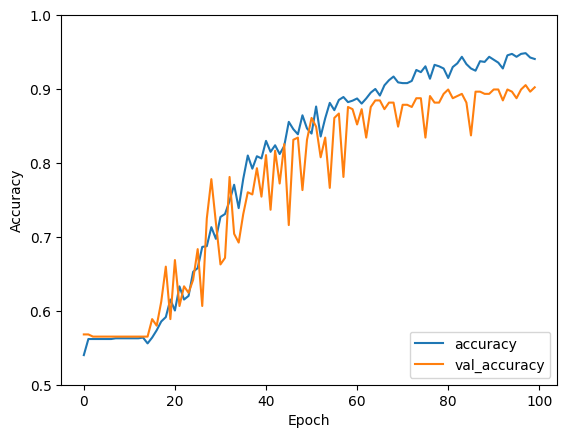

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### ra20, rt20, la20, lt20 classification

In [55]:
print(peak_same_ra20.shape)
print(peak_same_rt20.shape)
print(peak_same_la20.shape)
print(peak_same_lt20.shape)

(543, 160)
(594, 160)
(759, 160)
(590, 160)


In [56]:
label = [0]*543 + [1]*594 + [2]*759 + [3]*590  # 각각의 데이터에 대한 label을 부여
label = pd.DataFrame(label)
len(label)

2486

In [57]:
train = pd.concat([peak_same_ra20, peak_same_rt20, peak_same_la20, peak_same_lt20], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

label:  (2486, 1) train:  (2486, 160)


In [58]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25, random_state=15)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

x_train:  (1864, 160) x_test:  (622, 160) y_train:  (1864, 1) y_test:  (622, 1)


In [59]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(1864, 160, 1) (622, 160, 1)
(1864, 4) (622, 4)


In [63]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(160,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 157, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 153, 20)        │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 76, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1520)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │         6,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,154 (27.95 KB)

 Trainable params: 7,154 (27.95 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2990 - loss: 1.3819 - val_accuracy: 0.3119 - val_loss: nan
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2803 - loss: 1.3790 - val_accuracy: 0.3119 - val_loss: nan
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 1.3717 - val_accuracy: 0.3119 - val_loss: nan
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3142 - loss: 1.3679 - val_accuracy: 0.2942 - val_loss: nan
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3121 - loss: 1.3722 - val_accuracy: 0.3087 - val_loss: nan
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3224 - loss: 1.3607 - val_accuracy: 0.3071 - val_loss: nan
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3060 - loss: 1.3586 - val_accuracy: 0.3055 - val_loss: nan
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3272 - loss: 1.3539 - val_accuracy: 0.3055 - val_loss: nan
Epoch 9/

20/20 - 0s - 2ms/step - accuracy: 0.8264 - loss: nan


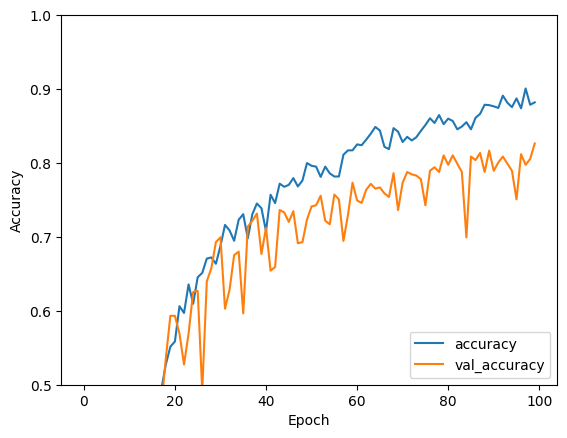

In [65]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

결과는 4가지중 랜덤하게 뽑을 확률 0.25부근에서 시작해서, val값이 약 0.8을 넘는 것으로 확인됌. 즉, 나눌 수 있다.

### Empty VS ra20

In [105]:
print(peak_same_empty.shape)
print(peak_same_ra20.shape)

(500, 160)
(543, 160)


In [106]:
label = [0]*500 + [1]*543
label = pd.DataFrame(label)
train = pd.concat([peak_same_empty[:500], peak_same_ra20[:543]], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

label:  (1043, 1) train:  (1043, 160)


In [107]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25, random_state=15)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

x_train:  (782, 160) x_test:  (261, 160) y_train:  (782, 1) y_test:  (261, 1)


In [108]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [109]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(160,1)))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),)

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 157, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 153, 20)        │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 76, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1520)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         1,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,591 (10.12 KB)

 Trainable params: 2,591 (10.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4650 - loss: 0.6941 - val_accuracy: 0.5441 - val_loss: 0.6913
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5200 - loss: 0.6921 - val_accuracy: 0.5441 - val_loss: 0.6887
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5196 - loss: 0.6907 - val_accuracy: 0.5479 - val_loss: 0.6883
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5238 - loss: 0.6906 - val_accuracy: 0.5556 - val_loss: 0.6876
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5559 - loss: 0.6885 - val_accuracy: 0.5517 - val_loss: 0.6866
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5260 - loss: 0.6899 - val_accuracy: 0.5479 - val_loss: 0.6853
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 0.6895 - val_accuracy: 0.5747 - val_loss: 0.6829
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5409 - loss: 0.6858 - val_accuracy: 0.5326 - v

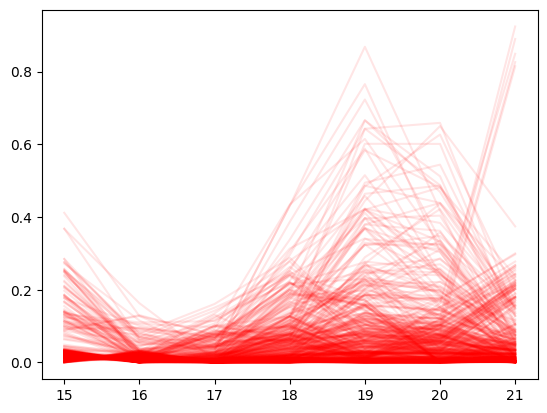

In [137]:
for i in range(500):
    plt.plot(peak_same_empty.iloc[i][15:22], color='red', alpha=0.1, label="empty")


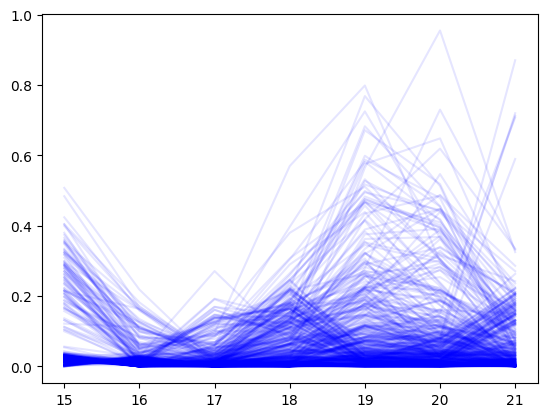

In [136]:
for i in range(500):
    plt.plot(peak_same_ra20.iloc[i][15:22], color='blue', alpha=0.1, label="ra20") # 8ns 부근

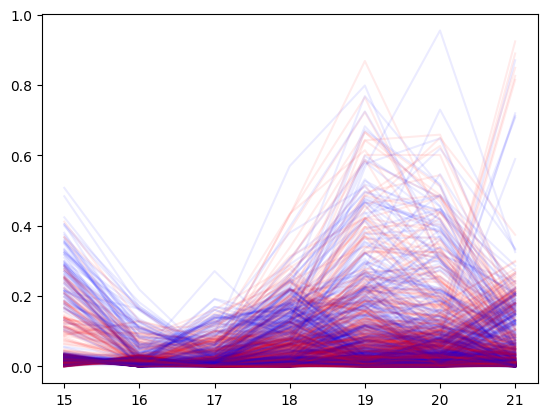

In [189]:
for i in range(500):
    plt.plot(peak_same_empty.iloc[i][15:22], color='red', alpha=0.08, label="empty")
    plt.plot(peak_same_ra20.iloc[i][15:22], color='blue', alpha=0.08, label="ra20") # 8ns 부근

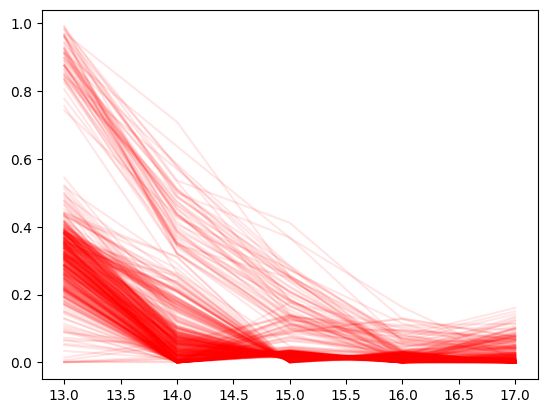

In [135]:
for i in range(500):
    plt.plot(peak_same_empty.iloc[i][13:18], color='red', alpha=0.1, label="empty")

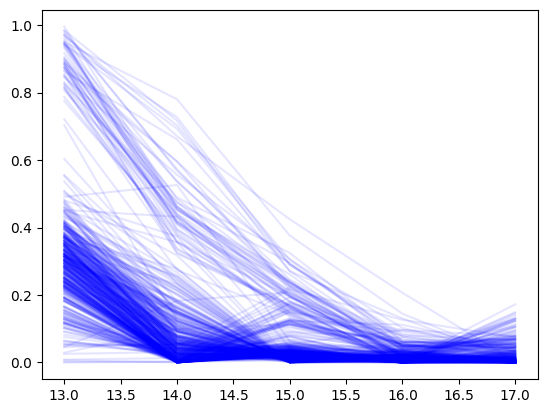

In [184]:
for i in range(500):
    plt.plot(peak_same_ra215.iloc[i][13:18], color='blue', alpha=0.1, label="empty") # 5ns 부근

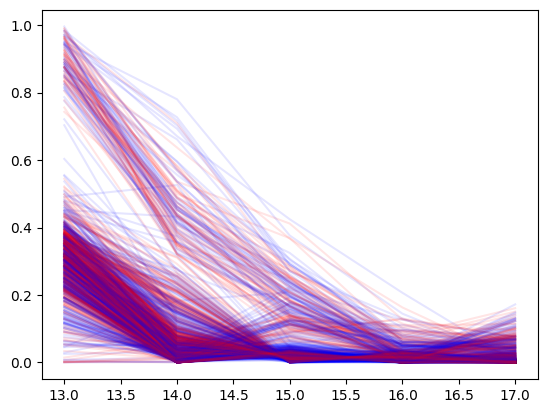

In [185]:
for i in range(500):
    plt.plot(peak_same_ra215.iloc[i][13:18], color='blue', alpha=0.1, label="empty") # 5ns 부근
    plt.plot(peak_same_empty.iloc[i][13:18], color='red', alpha=0.1, label="empty")

8     0.000798
9    -0.003186
10    0.000000
11   -0.005820
12    0.000214
13   -0.006365
14   -0.010975
15   -0.005739
16   -0.000538
17   -0.000516
18   -0.000847
19   -0.001493
20   -0.002918
21    0.002534
22    0.000216
23   -0.000058
24    0.002841
dtype: float64


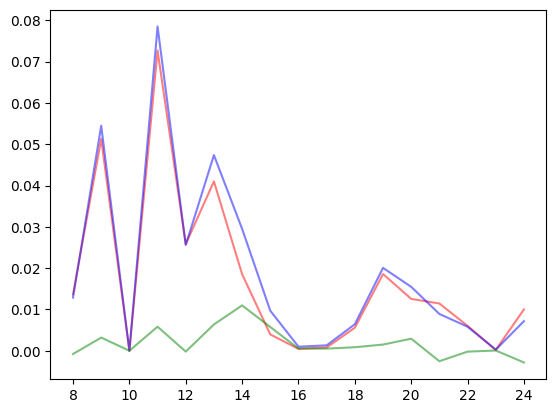

In [147]:
# 분산 비교
var_peak_same_empty = peak_same_empty.var()
var_peak_same_ra20 = peak_same_ra20.var()
var_peak_same_ra215 = peak_same_ra215.var()
plt.plot(var_peak_same_empty[8:25], color='red', alpha=0.5, label='var_peak_same_empty')
plt.plot(var_peak_same_ra20[8:25], color='blue', alpha=0.5, label='var_peak_same_ra20')  # 8ns 부근
plt.plot(var_peak_same_ra20[8:25] - var_peak_same_empty[8:25], color='green', alpha=0.5, label='var_peak_same_ra20 - var_peak_same_empty')  # 8ns 부근
print(var_peak_same_empty[8:25] - var_peak_same_ra20[8:25])  # 8ns 부근

8    -0.001562
9    -0.003798
10    0.000000
11   -0.005471
12    0.000716
13   -0.000850
14   -0.003226
15   -0.000897
16   -0.000048
17   -0.000058
18   -0.000331
19   -0.004426
20   -0.004915
21    0.003094
22   -0.002037
23    0.000056
24    0.001914
dtype: float64


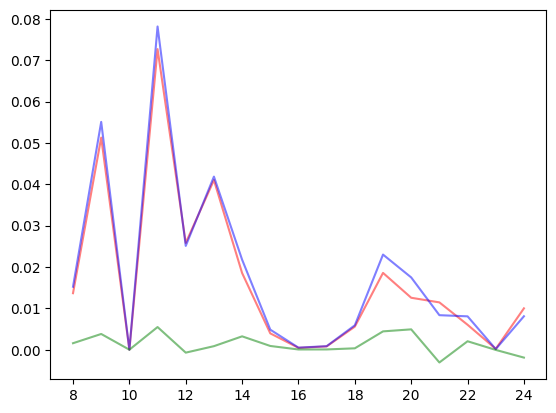

In [148]:
plt.plot(var_peak_same_empty[8:25], color='red', alpha=0.5, label='var_peak_same_empty')
plt.plot(var_peak_same_ra215[8:25], color='blue', alpha=0.5, label='var_peak_same_ra215')  # 5ns 부근
plt.plot(var_peak_same_ra215[8:25] - var_peak_same_empty[8:25], color='green', alpha=0.5, label='var_peak_same_ra215 - var_peak_same_empty')  # 5ns 부근
print(var_peak_same_empty[8:25] - var_peak_same_ra215[8:25])  # 5ns 부근

### 정확도 올리기

In [178]:
label = [0]*500 + [1]*500
label = pd.DataFrame(label)

train = pd.concat([peak_same_ra20[:500], peak_same_rt20[:500]], ignore_index=True)
print("label: ", label.shape, "train: ", train.shape)

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25, random_state=42)
print("x_train: ", x_train.shape, "x_test: ", x_test.shape, "y_train: ", y_train.shape, "y_test: ", y_test.shape)

# 데이터 차원을 맞추기 위해 차원 추가
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

label:  (1000, 1) train:  (1000, 160)
x_train:  (750, 160) x_test:  (250, 160) y_train:  (750, 1) y_test:  (250, 1)


In [180]:
model = models.Sequential()
model.add(layers.Conv1D(10, 4, activation='relu', input_shape=(160,1)))
model.add(layers.Conv1D(15, 5, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(20, 5, activation='relu'))
model.add(layers.MaxPool1D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid')) # 이진 분류를 위해 sigmoid사용함
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # overfitting을 방지하기 위해 early stopping을 사용

# 학습
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=0)

c:\Users\jkwor\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)              │ (None, 157, 10)        │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 153, 15)        │           765 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 153, 15)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ (None, 149, 20)        │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 74, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 1480)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │         1,481 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,816 (14.91 KB)

 Trainable params: 3,816 (14.91 KB)

 Non-trainable params: 0 (0.00 B)

8/8 - 0s - 3ms/step - accuracy: 0.9480 - loss: 0.2678


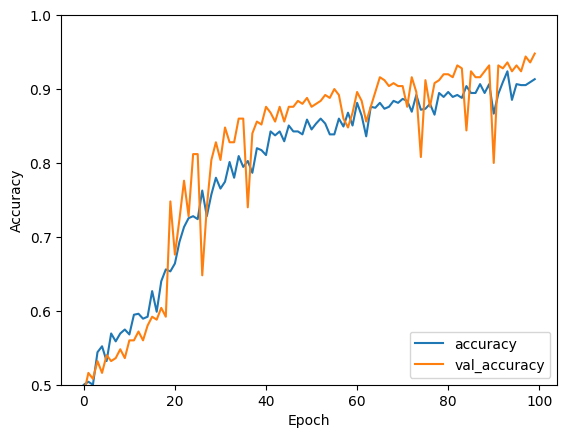

In [181]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

성능을 높이기 위해, Conv1D layer한 층과, Dropout layer를 추가하였다.  
그 결과 대략 80~였던 정확도를 약 95%정도까지 늘릴 수 있었다.